In [2]:
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [3]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [4]:
train_data = pd.read_csv("emotions_dataset.txt" , header=None , sep=";" , names=["Comment" , "Emotions"] , encoding="utf-8")

In [5]:
train_data

Comment Emotions
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

In [6]:
train_data["length"] = [len(x) for x in train_data['Comment']]

In [7]:
train_data

Comment Emotions  length
0                                i didnt feel humiliated  sadness      23
1      i can go from feeling so hopeless to so damned...  sadness     108
2       im grabbing a minute to post i feel greedy wrong    anger      48
3      i am ever feeling nostalgic about the fireplac...     love      92
4                                   i am feeling grouchy    anger      20
...                                                  ...      ...     ...
15995  i just had a very brief time in the beanbag an...  sadness     101
15996  i am now turning and i feel pathetic that i am...  sadness     102
15997                     i feel strong and good overall      joy      30
15998  i feel like this was such a rude comment and i...    anger      59
15999  i know a lot but i feel so stupid because i ca...  sadness      62

[16000 rows x 3 columns]

In [8]:
train_data.head()

Comment Emotions  length
0                            i didnt feel humiliated  sadness      23
1  i can go from feeling so hopeless to so damned...  sadness     108
2   im grabbing a minute to post i feel greedy wrong    anger      48
3  i am ever feeling nostalgic about the fireplac...     love      92
4                               i am feeling grouchy    anger      20

In [9]:
train_data.shape

(16000, 3)

In [10]:
train_data['word_count'] = [len(x.split()) for x in train_data['Comment']]

In [11]:
train_data

Comment Emotions  length  \
0                                i didnt feel humiliated  sadness      23   
1      i can go from feeling so hopeless to so damned...  sadness     108   
2       im grabbing a minute to post i feel greedy wrong    anger      48   
3      i am ever feeling nostalgic about the fireplac...     love      92   
4                                   i am feeling grouchy    anger      20   
...                                                  ...      ...     ...   
15995  i just had a very brief time in the beanbag an...  sadness     101   
15996  i am now turning and i feel pathetic that i am...  sadness     102   
15997                     i feel strong and good overall      joy      30   
15998  i feel like this was such a rude comment and i...    anger      59   
15999  i know a lot but i feel so stupid because i ca...  sadness      62   

       word_count  
0               4  
1              21  
2              10  
3              18  
4               4  
...           ...  
15995          24  
15996          20  
15997           6  
15998          14  
15999          15  

[16000 rows x 4 columns]

In [12]:
train_data.isnull().sum()

Comment       0
Emotions      0
length        0
word_count    0
dtype: int64

In [13]:
train_data.duplicated().sum()

1

In [14]:
train_data.drop_duplicates(inplace=True)

In [15]:
train_data.duplicated().sum()

0

In [16]:
train_data['Emotions'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotions, dtype: int64

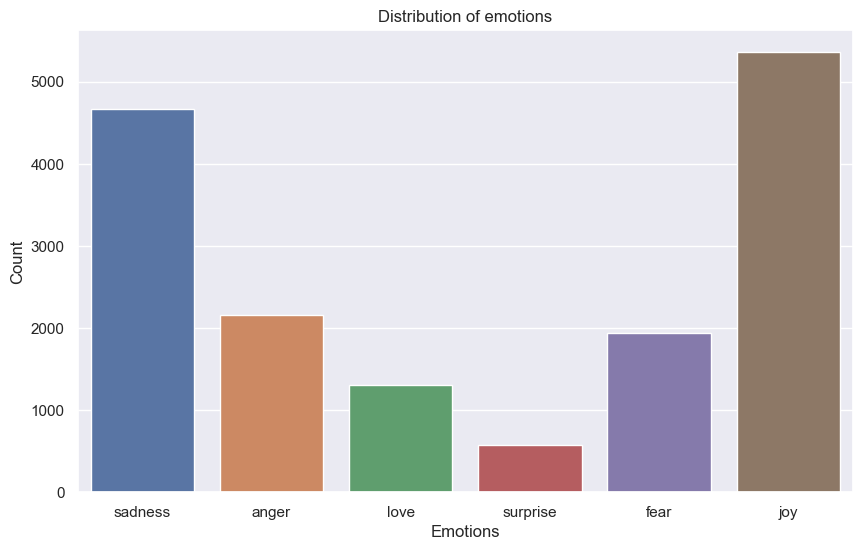

In [17]:
sns.set(style = "darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x="Emotions" , data=train_data)

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title("Distribution of emotions")
plt.show()

In [18]:
import plotly.express as px

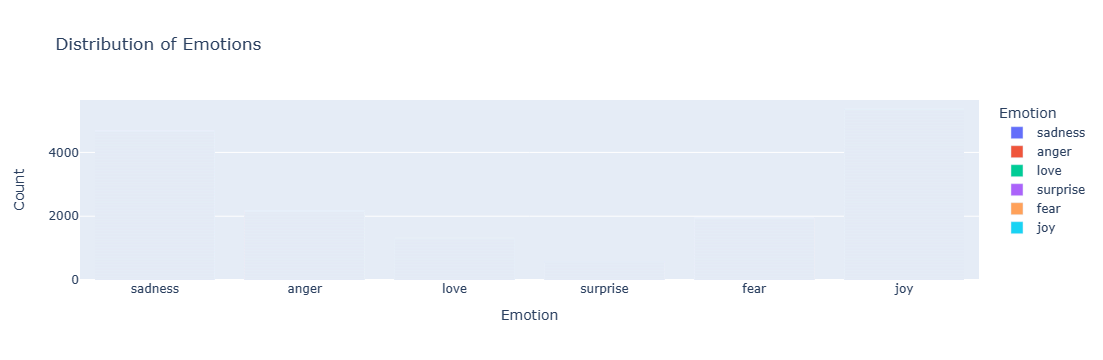

In [19]:
fig = px.bar(train_data , x = 'Emotions' ,
             title="Distribution of Emotions" ,
             color='Emotions',
             labels={'Emotions':'Emotion' , 'count':'Count'})
                     
fig.update_traces(hovertemplate = '%{y}')
fig.show()

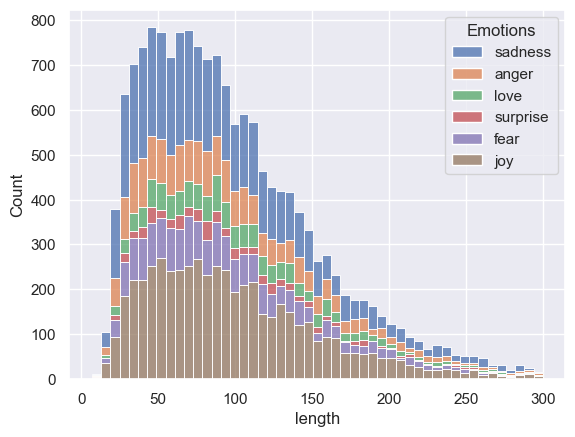

In [20]:
df2 = train_data.copy()
df2['length'] = [len(x) for x in df2['Comment']]
length_values = df2['length'].values
sns.histplot(data = df2 , x='length' , hue='Emotions' , multiple='stack')
plt.show()

In [21]:
length_values

array([ 23, 108,  48, ...,  30,  59,  62], dtype=int64)

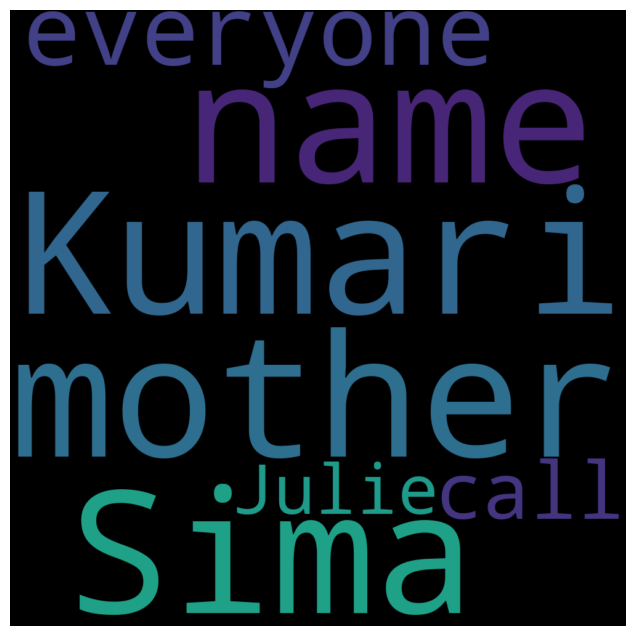

In [22]:
text = " My mother name is Sima Kumari , but everyone call her Julie"
wc = WordCloud(width=1000 ,
               height=1000 , 
              background_color='black',
              max_words= 1000,
              contour_width=5,
              contour_color='white',
              ).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc , interpolation='bilinear')
plt.axis('off')
plt.show()


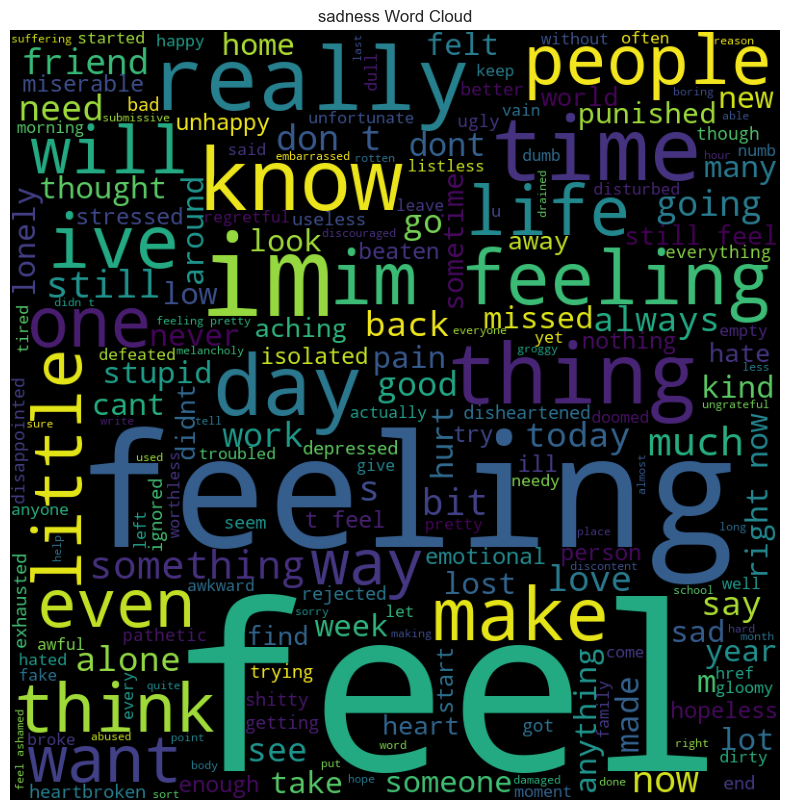

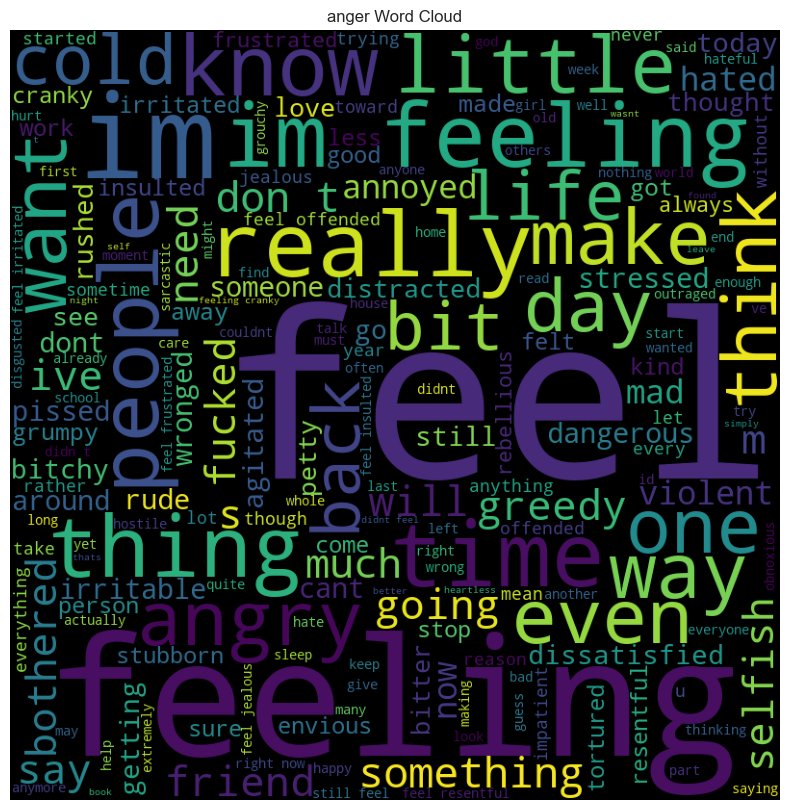

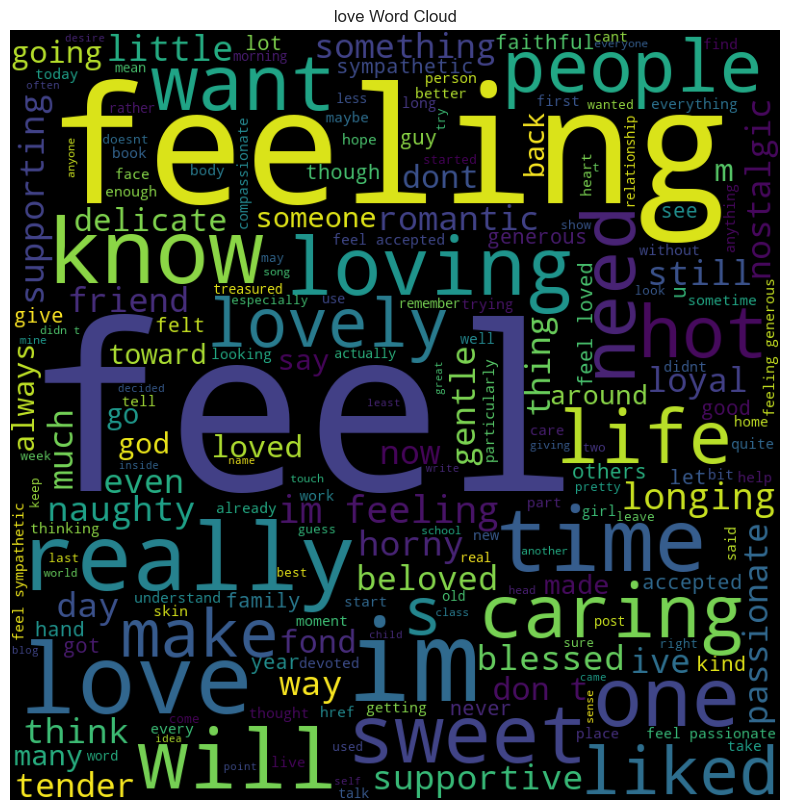

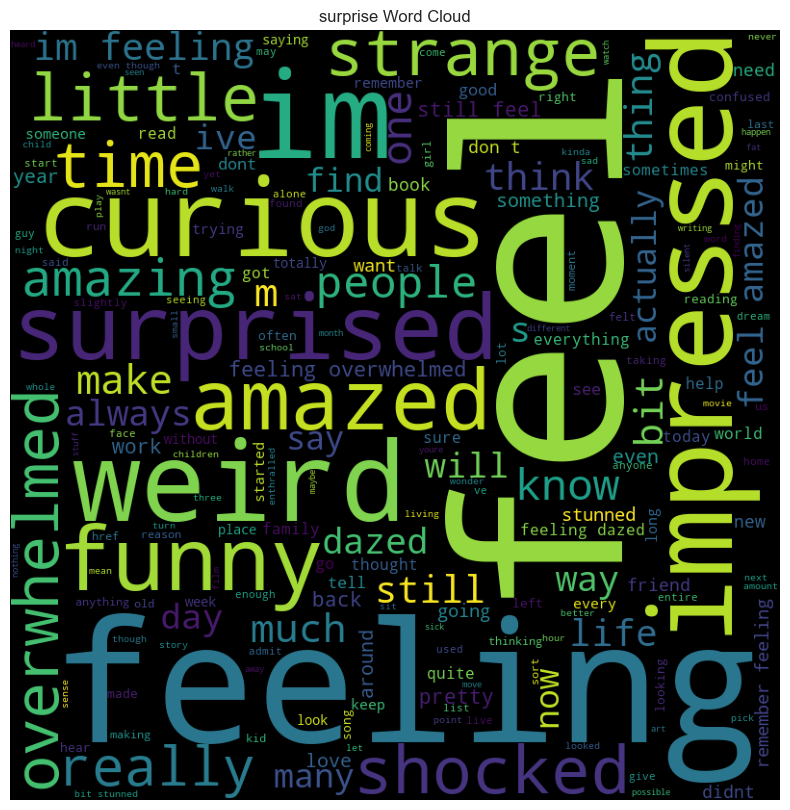

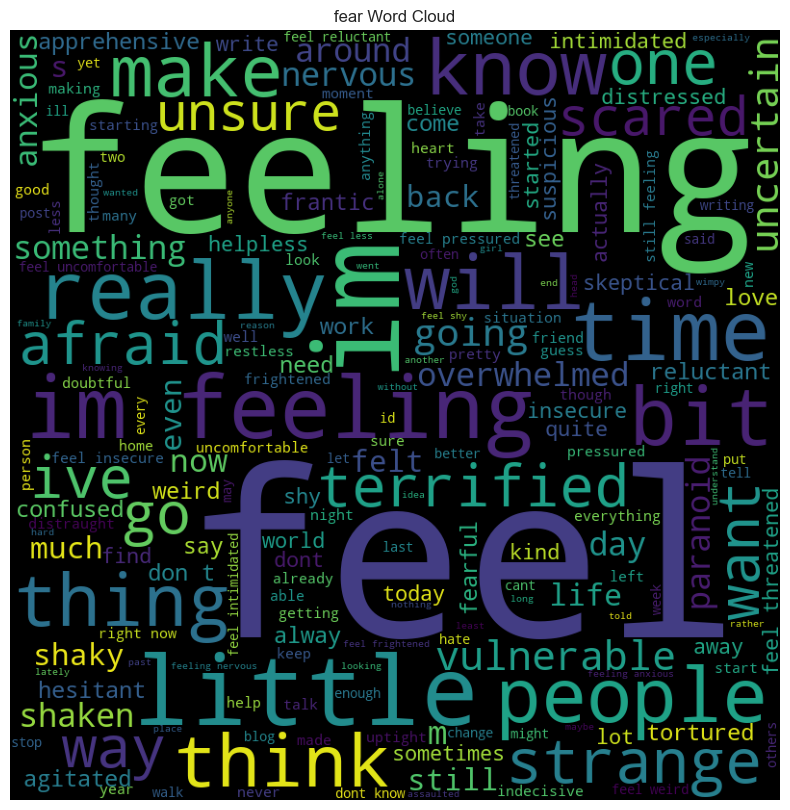

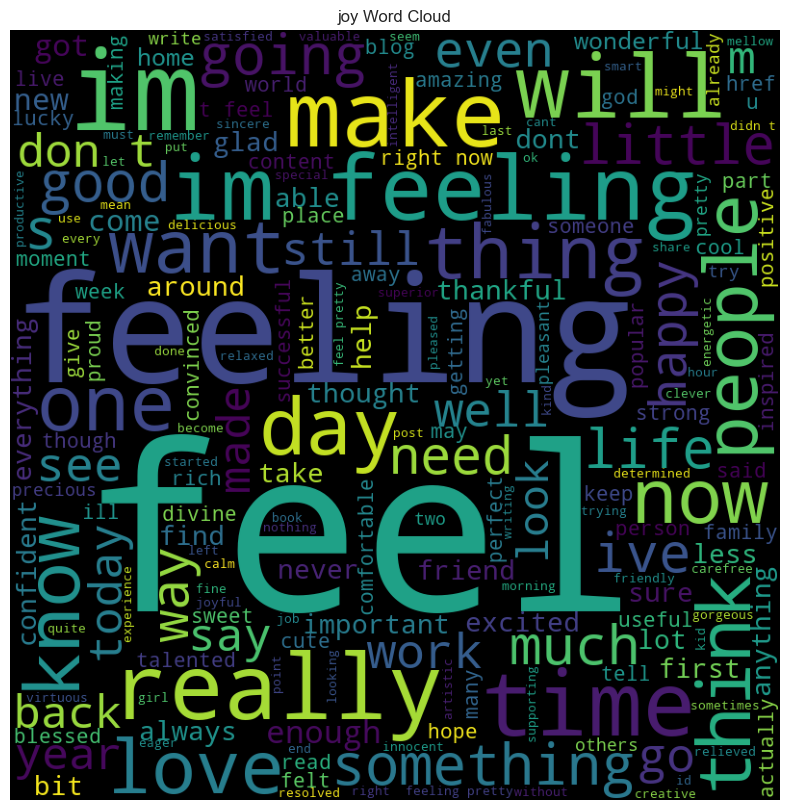

In [23]:
def words_cloud(wordcloud , emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion +  " Word Cloud")
    plt.imshow(wordcloud)
    plt.axis('off')

emotions_list = train_data['Emotions'].unique()
for emotion in emotions_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data['Emotions'] == emotion,'Comment']])
    wordcloud = WordCloud(width=800, height=800).generate(text)
    words_cloud(wordcloud,emotion)

In [24]:
lb = LabelEncoder()
train_data["Emotion_Value"] = lb.fit_transform(train_data['Emotions'])

In [25]:
train_data

Comment Emotions  length  \
0                                i didnt feel humiliated  sadness      23   
1      i can go from feeling so hopeless to so damned...  sadness     108   
2       im grabbing a minute to post i feel greedy wrong    anger      48   
3      i am ever feeling nostalgic about the fireplac...     love      92   
4                                   i am feeling grouchy    anger      20   
...                                                  ...      ...     ...   
15995  i just had a very brief time in the beanbag an...  sadness     101   
15996  i am now turning and i feel pathetic that i am...  sadness     102   
15997                     i feel strong and good overall      joy      30   
15998  i feel like this was such a rude comment and i...    anger      59   
15999  i know a lot but i feel so stupid because i ca...  sadness      62   

       word_count  Emotion_Value  
0               4              4  
1              21              4  
2              10              0  
3              18              3  
4               4              0  
...           ...            ...  
15995          24              4  
15996          20              4  
15997           6              2  
15998          14              0  
15999          15              4  

[15999 rows x 5 columns]

In [26]:
train_data.head(20)

Comment  Emotions  length  \
0                             i didnt feel humiliated   sadness      23   
1   i can go from feeling so hopeless to so damned...   sadness     108   
2    im grabbing a minute to post i feel greedy wrong     anger      48   
3   i am ever feeling nostalgic about the fireplac...      love      92   
4                                i am feeling grouchy     anger      20   
5   ive been feeling a little burdened lately wasn...   sadness      65   
6   ive been taking or milligrams or times recomme...  surprise     122   
7   i feel as confused about life as a teenager or...      fear      73   
8   i have been with petronas for years i feel tha...       joy      98   
9                                 i feel romantic too      love      19   
10  i feel like i have to make the suffering i m s...   sadness      66   
11  i do feel that running is a divine experience ...       joy     108   
12  i think it s the easiest time of year to feel ...     anger      58   
13                 i feel low energy i m just thirsty   sadness      34   
14  i have immense sympathy with the general point...       joy     219   
15    i do not feel reassured anxiety is on each side       joy      47   
16               i didnt really feel that embarrassed   sadness      36   
17            i feel pretty pathetic most of the time   sadness      39   
18  i started feeling sentimental about dolls i ha...   sadness     125   
19  i now feel compromised and skeptical of the va...      fear      80   

    word_count  Emotion_Value  
0            4              4  
1           21              4  
2           10              0  
3           18              3  
4            4              0  
5           12              4  
6           23              5  
7           17              1  
8           19              2  
9            4              3  
10          14              4  
11          21              2  
12          12              0  
13           8              4  
14          42              2  
15          10              2  
16           6              4  
17           8              4  
18          23              4  
19          17              1

Applying Machine Learning 


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report

In [28]:
df = train_data.copy()
df

Comment Emotions  length  \
0                                i didnt feel humiliated  sadness      23   
1      i can go from feeling so hopeless to so damned...  sadness     108   
2       im grabbing a minute to post i feel greedy wrong    anger      48   
3      i am ever feeling nostalgic about the fireplac...     love      92   
4                                   i am feeling grouchy    anger      20   
...                                                  ...      ...     ...   
15995  i just had a very brief time in the beanbag an...  sadness     101   
15996  i am now turning and i feel pathetic that i am...  sadness     102   
15997                     i feel strong and good overall      joy      30   
15998  i feel like this was such a rude comment and i...    anger      59   
15999  i know a lot but i feel so stupid because i ca...  sadness      62   

       word_count  Emotion_Value  
0               4              4  
1              21              4  
2              10              0  
3              18              3  
4               4              0  
...           ...            ...  
15995          24              4  
15996          20              4  
15997           6              2  
15998          14              0  
15999          15              4  

[15999 rows x 5 columns]

In [29]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
len(nltk.corpus.stopwords.words('english'))

179

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    return text
clean_text("I am %12 anshul")    

'I am     anshul'

In [33]:
def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    return text
clean_text("I am %12 anshul")    

['i', 'am', 'anshul']

In [34]:
def clean_text1(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
    
    

In [35]:
clean_text1("I am Anshul123 . I Hated loved Hate1")

'anshul hate love hate'

In [36]:
df["Comment_Preprocessing"] = df["Comment"].apply(clean_text1)

In [37]:
df.head()

Comment Emotions  length  \
0                            i didnt feel humiliated  sadness      23   
1  i can go from feeling so hopeless to so damned...  sadness     108   
2   im grabbing a minute to post i feel greedy wrong    anger      48   
3  i am ever feeling nostalgic about the fireplac...     love      92   
4                               i am feeling grouchy    anger      20   

   word_count  Emotion_Value  \
0           4              4   
1          21              4   
2          10              0   
3          18              3   
4           4              0   

                               Comment_Preprocessing  
0                                  didnt feel humili  
1  go feel hopeless damn hope around someon care ...  
2               im grab minut post feel greedi wrong  
3     ever feel nostalg fireplac know still properti  
4                                       feel grouchi

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ANSHUL
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
def clean_text2(text):
    lemmatizer = WordNetLemmatizer()
    text = re.sub("[^a-zA-Z]" , " " ,text)
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords]
    return " ".join(text)

In [40]:
df["Comment_Final"] = df["Comment"].apply(clean_text2)

In [41]:
df.head()

Comment Emotions  length  \
0                            i didnt feel humiliated  sadness      23   
1  i can go from feeling so hopeless to so damned...  sadness     108   
2   im grabbing a minute to post i feel greedy wrong    anger      48   
3  i am ever feeling nostalgic about the fireplac...     love      92   
4                               i am feeling grouchy    anger      20   

   word_count  Emotion_Value  \
0           4              4   
1          21              4   
2          10              0   
3          18              3   
4           4              0   

                               Comment_Preprocessing  \
0                                  didnt feel humili   
1  go feel hopeless damn hope around someon care ...   
2               im grab minut post feel greedi wrong   
3     ever feel nostalg fireplac know still properti   
4                                       feel grouchi   

                                       Comment_Final  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy

In [42]:
X_train,X_test,y_train,y_test = train_test_split(df['Comment_Final'],df['Emotion_Value'],test_size=0.2,random_state=42)

In [43]:
X_train

676      refers course though cant help feeling somehow...
14180      would feel awkward someone tell feeling towards
7077     feel like probably would liked book little bit...
13004    ive slowed take time listen child moment feel ...
10264                         feel vital rlsh gimmick need
                               ...                        
13418    love leave reader feeling confused slightly de...
5390                                         feel delicate
860                          starting feel little stressed
15796    feel acceptable music criticism reinforce conc...
7270         feel someone rude wrongly done something lose
Name: Comment_Final, Length: 12799, dtype: object

In [44]:
y_train

676      2
14180    4
7077     3
13004    2
10264    2
        ..
13418    1
5390     3
860      4
15796    2
7270     0
Name: Emotion_Value, Length: 12799, dtype: int32

In [45]:
X_test

8756                             ive made week feel beaten
4660                              feel strategy worthwhile
6095                     feel worthless weak say want find
304                                        feel clever nov
8241                      im moved ive feeling kind gloomy
                               ...                        
15578    feel useful pulpit find ironic often question ...
5746              dried bladder ready day im feeling brave
6395                              feel thrilled matter day
7624     woke morning text mr c declaring walking work ...
15245                                            feel dumb
Name: Comment_Final, Length: 3200, dtype: object

In [46]:
y_test

8756     4
4660     2
6095     4
304      2
8241     4
        ..
15578    2
5746     2
6395     2
7624     2
15245    4
Name: Emotion_Value, Length: 3200, dtype: int32

In [47]:
row_label = '0'
select_row = str(df.loc[0])
print(select_row)

Comment                  i didnt feel humiliated
Emotions                                 sadness
length                                        23
word_count                                     4
Emotion_Value                                  4
Comment_Preprocessing          didnt feel humili
Comment_Final              didnt feel humiliated
Name: 0, dtype: object


In [48]:
print(str(df.loc[676]))

Comment                  i refers of course though i cant help feeling ...
Emotions                                                               joy
length                                                                 159
word_count                                                              25
Emotion_Value                                                            2
Comment_Preprocessing    refer cours though cant help feel somehow iron...
Comment_Final            refers course though cant help feeling somehow...
Name: 676, dtype: object


In [49]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [50]:
X_train_tfidf.shape

(12799, 11968)

In [51]:
X_test_tfidf.shape

(3200, 11968)

In [52]:
Classifiers = {
    "Naive Bayes" : MultinomialNB(),
    "Logisctic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC()
}

for name ,clf in Classifiers.items():
    print(f"\n\n {name}")
    clf.fit(X_train_tfidf,y_train)

    y_pred_tfidf = clf.predict(X_test_tfidf)

    accuracy_tfidf = accuracy_score(y_test , y_pred_tfidf)
    print(f"\nAccuracy Score : {accuracy_tfidf}")
    classification_tfidf = classification_report(y_test , y_pred_tfidf)
    print(f"\nClassification Report : \t {classification_tfidf}")

    
    



 Naive Bayes

Accuracy Score : 0.663125

Classification Report : 	               precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.87      0.20      0.33       375
           2       0.59      0.98      0.74      1027
           3       1.00      0.04      0.07       303
           4       0.71      0.93      0.81       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.59      3200



 Logisctic Regression


C:\Users\ANSHUL KUMAR\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Accuracy Score : 0.858125

Classification Report : 	               precision    recall  f1-score   support

           0       0.91      0.81      0.85       439
           1       0.86      0.75      0.80       375
           2       0.80      0.96      0.87      1027
           3       0.92      0.60      0.72       303
           4       0.90      0.94      0.92       950
           5       0.84      0.44      0.58       106

    accuracy                           0.86      3200
   macro avg       0.87      0.75      0.79      3200
weighted avg       0.86      0.86      0.85      3200



 Random Forest

Accuracy Score : 0.88375

Classification Report : 	               precision    recall  f1-score   support

           0       0.87      0.87      0.87       439
           1       0.86      0.87      0.86       375
           2       0.87      0.92      0.90      1027
           3       0.85      0.72      0.78       303
           4       0.92      0.93      0.93       950
        

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
rf_y_pred = rf.predict(X_test_tfidf)

In [54]:
def predict_emotion(input):
    final_text = clean_text2(input)
    input_tfidf = tfidf_vectorizer.transform([final_text])

    final_label = rf.predict(input_tfidf)[0]
    final_emotion = lb.inverse_transform([final_label])[0]
    Emotion = np.max(rf.predict(input_tfidf))

    return final_emotion , Emotion

    

In [55]:
predict_emotion("He is really sweet")

('love', 3)

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_tfidf,y_train)
# best_params = grid_search.best_params_
# best_rf = RandomForestClassifier(**best_params)
# best_rf.fit(X_train_tfidf,y_train)

# rf_y_pred1 = best_rf.predict(X_test_tfidf)

# print(f"\n Best Parameters : f{best_params}")

# accuracy_tfidf = accuracy_score(y_test, rf_y_pred1)
# print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
# print("Classification Report:")
# print(classification_report(y_test, rf_y_pred1))

In [58]:
import pickle
pickle.dump(rf,open("Random_Forest.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))


In [59]:
with open('tfidf_vectorizer.pkl','wb') as f:
    pickle.dump(tfidf_vectorizer,f)